<a href="https://colab.research.google.com/github/Dri-anS/AMS/blob/main/HarryMaguire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import time
import tweepy
import numpy as np

In [5]:
def twitter_config():
    """
    Fungsi utilitas untuk mengkonfigurasi konsumsi file API Twitter dengan␣
    ,!kunci yang disediakan.
    """
    # Otentikasi dan akses menggunakan kunci:
    auth = tweepy.OAuthHandler("XGGIQ7T9WRg3JpBJOrX7NfkbE",
    "iQSaKgVIekk7kq9P7f96fkPqcN5tO8xGBfpFQac9pd6aav2nho")
    auth.set_access_token("1575101006647795714-8U17W8fWcPeKn1idEC5YcsnS03IvjL",
    "k00NRCbQnI8SOMDUre1Axi4cFq48N1oPQtaW09Gc9naGR")
    # Kembalikan akses ke API:
    api = tweepy.API(auth)
    try:
        api.verify_credentials()
        print("Authentication OK")
    except:
        print("Error during authentication")
    return api

In [6]:
extractor = twitter_config()

Authentication OK


In [7]:
tweets = extractor.user_timeline(screen_name="HarryMaguire93", count=1000)
print("Tweets terambil: {}.\n".format(len(tweets)))


print("5 tweet teratas:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Tweets terambil: 200.

5 tweet teratas:

👏🏼👏🏼👏🏼 https://t.co/nI9FOJEZt4

RT @England: We are uniting with nine other European countries in support of OneLove, a campaign that will use the power of football to pro…

🏴󠁧󠁢󠁥󠁮󠁧󠁿👌🏼 @England https://t.co/aDb1xMcqyK

RT @ManUtd: In memory of Her Majesty Queen Elizabeth II. https://t.co/Iw7Rkfy3Tt

Great team effort. Thanks to the fans who travelled so far, as always you were unbelievable 🔴⚫️⚪️ #mufc https://t.co/ov8DxynYcU



In [22]:
dataset = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Kami membuat tampilan kerangka data:
display(dataset.head(100))

,Tweets
0,👏🏼👏🏼👏🏼 https://t.co/nI9FOJEZt4
1,RT @England: We are uniting with nine other Eu...
2,🏴󠁧󠁢󠁥󠁮󠁧󠁿👌🏼 @England https://t.co/aDb1xMcqyK
3,RT @ManUtd: In memory of Her Majesty Queen Eli...
4,Great team effort. Thanks to the fans who trav...
...,...
95,@msmcglau @champneys @msmcglau admire all the ...
96,@RichardRedman18 Have a great Xmas pleased he ...
97,@BBCSport @EmmaRaducanu Well done @EmmaRaducan...
98,@sloth_sloman @ManUtd 😊 she will have a lovely...


In [9]:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [10]:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1579499267403960320
2022-10-10 15:49:05
Twitter for iPhone
15074
564
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/nI9FOJEZt4', 'expanded_url': 'https://twitter.com/manutd/status/1579470190588620800', 'display_url': 'twitter.com/manutd/status/…', 'indices': [7, 30]}]}


In [11]:
dataset['len'] = np.array([len(tweet.text) for tweet in tweets])
dataset['ID']  = np.array([tweet.id for tweet in tweets])
dataset['Created'] = np.array([tweet.created_at for tweet in tweets])
dataset['Source'] = np.array([tweet.source for tweet in tweets])
dataset['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
dataset['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

In [12]:
dataset.head()

,Tweets,len,ID,Created,Source,Likes,RTs
0,👏🏼👏🏼👏🏼 https://t.co/nI9FOJEZt4,30,1579499267403960320,2022-10-10 15:49:05,Twitter for iPhone,15074,564
1,RT @England: We are uniting with nine other Eu...,140,1572568697822400514,2022-09-21 12:49:29,Twitter for iPhone,0,234
2,🏴󠁧󠁢󠁥󠁮󠁧󠁿👌🏼 @England https://t.co/aDb1xMcqyK,42,1572568571909373954,2022-09-21 12:48:59,Twitter for iPhone,45800,1769
3,RT @ManUtd: In memory of Her Majesty Queen Eli...,80,1571802917971148801,2022-09-19 10:06:32,Twitter for iPhone,0,2599
4,Great team effort. Thanks to the fans who trav...,127,1570507523656134656,2022-09-15 20:19:06,Twitter for iPhone,23937,843


In [13]:
# extract rata-rata:
media = np.mean(dataset['len'])

print("Jumlah rata-rata karakter di tweet: {}".format(media))

Jumlah rata-rata karakter di tweet: 90.175


In [14]:
# Kami mengekstrak tweet dengan FAV paling banyak dan dengan RT terbanyak:

fav_max = np.max(dataset['Likes'])
rt_max  = np.max(dataset['RTs'])

fav = dataset[dataset.Likes == fav_max].index[0]
rt  = dataset[dataset.RTs == rt_max].index[0]

# Max FAVs:
print("Tweet yang paling banyak disukai adalah: \n{}".format(dataset['Tweets'][fav]))
print("Jumlah suka: {}".format(fav_max))
print("{} Characters.\n".format(dataset['len'][fav]))

Tweet yang paling banyak disukai adalah: 
@ManUtd @Cristiano Welcome home @Cristiano 🙌🔴
Jumlah suka: 175966
45 Characters.



In [15]:
# Max RTs:
print("Tweet dengan retweet terbanyak adalah: \n{}".format(dataset['Tweets'][rt]))
print("Jumlah retweet: {}".format(rt_max))
print("{} Characters.\n".format(dataset['len'][rt]))

Tweet dengan retweet terbanyak adalah: 
RT @ManUtd: 🇵🇹🔴 𝗩𝗜𝗩𝗔 𝗥𝗢𝗡𝗔𝗟𝗗𝗢 🔴🇵🇹

🏡 @Cristiano is back!

#MUFC | #RonaldoReturns
Jumlah retweet: 86032
80 Characters.



In [16]:
tlen = pd.Series(data=dataset['len'].values, index=dataset['Created'])
tfav = pd.Series(data=dataset['Likes'].values, index=dataset['Created'])
tret = pd.Series(data=dataset['RTs'].values, index=dataset['Created'])

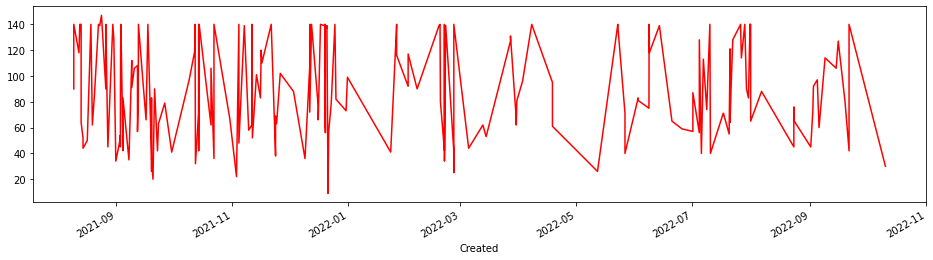

In [17]:
tlen.plot(figsize=(16,4), color='r');

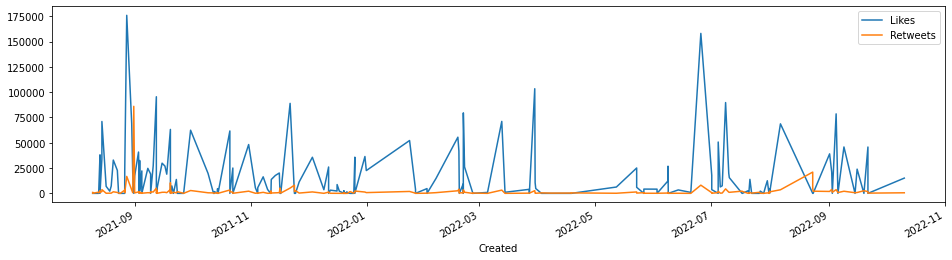

In [18]:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

In [19]:
sources = []
for source in dataset['Source']:
    if source not in sources:
        sources.append(source)

# pembuatan:
print("Sumber pembuatan konten:")
for source in sources:
    print("* {}".format(source))

Sumber pembuatan konten:
* Twitter for iPhone


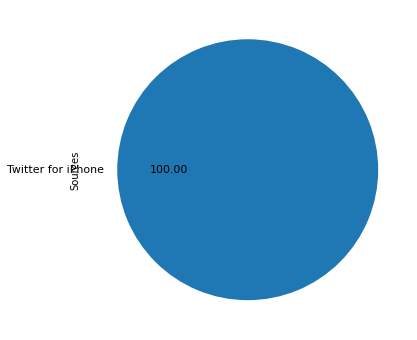

In [20]:
percent = np.zeros(len(sources))

for source in dataset['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

In [21]:
dataset.to_csv('dataset_user.csv',sep=';')